In [193]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import cv2

<IPython.core.display.Javascript object>


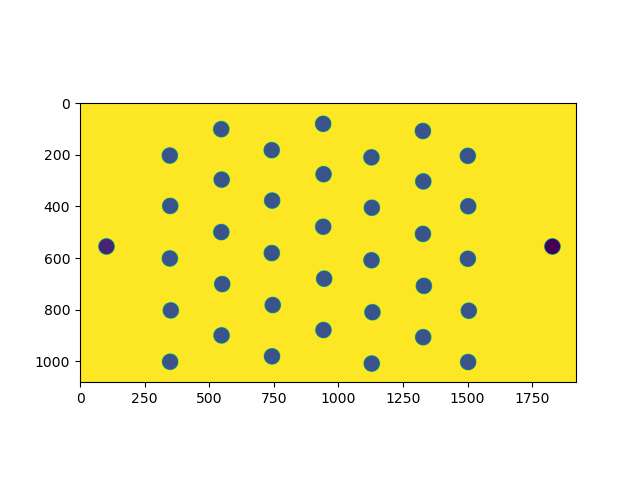

In [194]:
localMap = cv2.imread( "b3898d0e-ea1c-434b-b9b5-f354cead4217.jpg" )
plt.imshow( localMap )

In [195]:
# detect obstacles
gray = cv2.cvtColor( localMap, cv2.COLOR_BGR2GRAY )
gray_blured = cv2.blur( gray, (3, 3) )
plt.imshow( gray_blured )

In [196]:
obstacles = []
index     = 0
detected_circles = cv2.HoughCircles( gray_blured, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=1, maxRadius=40 )
if detected_circles is not None:
    detected_circles = np.uint16( np.around( detected_circles ) )
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
        pos = (a, b)
        
        # border outline
        cv2.circle( localMap, center=(a, b), radius=r, color=( 0, 0, 0 ), thickness=1 )
        obstacles.append( {
            "x" : a,
            "y" : b,
            "r" : r
        } )
        
        # create labels
        cv2.putText( localMap, text=str(index), org=(a,b),
            fontFace= cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(0,0,0),
            thickness=2, lineType=cv2.LINE_AA)
        
        index+=1

In [197]:
import pandas as pd
df = pd.DataFrame( obstacles )
df.head(5)

,x,y,r
0,742,182,31
1,1502,1002,31
2,550,700,31
3,1128,608,31
4,1326,506,31


In [198]:
# get coordinate of a given index
def get_coordinate( index ):
    try:
        return obstacles[ index ]
    except IndexError:
        return {}

In [199]:
start_point = 0
end_point   = 36

start = get_coordinate(start_point)
end   = get_coordinate(end_point)

In [200]:
print( start, end )

{'x': 742, 'y': 182, 'r': 31} {'x': 1506, 'y': 804, 'r': 31}


In [201]:
start_x = start['x']
start_y = start['y']
goal_x  = end['x']
goal_y  = end['y']

In [202]:
# create known obstacle positions
ox = []
oy = []
obsPoints = []

count = 0
for index, obj in enumerate(obstacles):
    if index != start_point and index != end_point:
        ox.append( obj['x'] )
        oy.append( obj['y'] )
        obsPoints.append( (obj['x'], obj['y']) )
        count+=1

In [203]:
# determine mesh size
meshSize = 10
if localMap.shape[0] > localMap.shape[1]:
    meshSize = localMap.shape[0]
else:
    meshSize = localMap.shape[1]

int(meshSize)

1920

In [204]:
x = np.arange( 0, meshSize, 100 )
y = np.arange( 0, 1080, 100 )
s = 7 # repulsiveness
r = 20 # radius
goalR = 60 # goal radius

# create mesh grid
X, Y = np.meshgrid( x, y )

In [205]:
def plot_graph(X, Y, delx, dely,obj, fig, ax, loc,r,i, color,start_goal=np.array([[0,0]])  ):
  #ax.quiver(X, Y, delx, dely)
  ax.minorticks_on()
  ax.grid(which='major', linestyle='-', linewidth=1, color='red')
  ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black')
  ax.add_patch(plt.Circle(loc, r, color=color))
  plt.plot(loc[0], loc[1], "-o")
  ax.annotate(obj, xy=loc, fontsize=10, ha="center")
  return ax

<IPython.core.display.Javascript object>


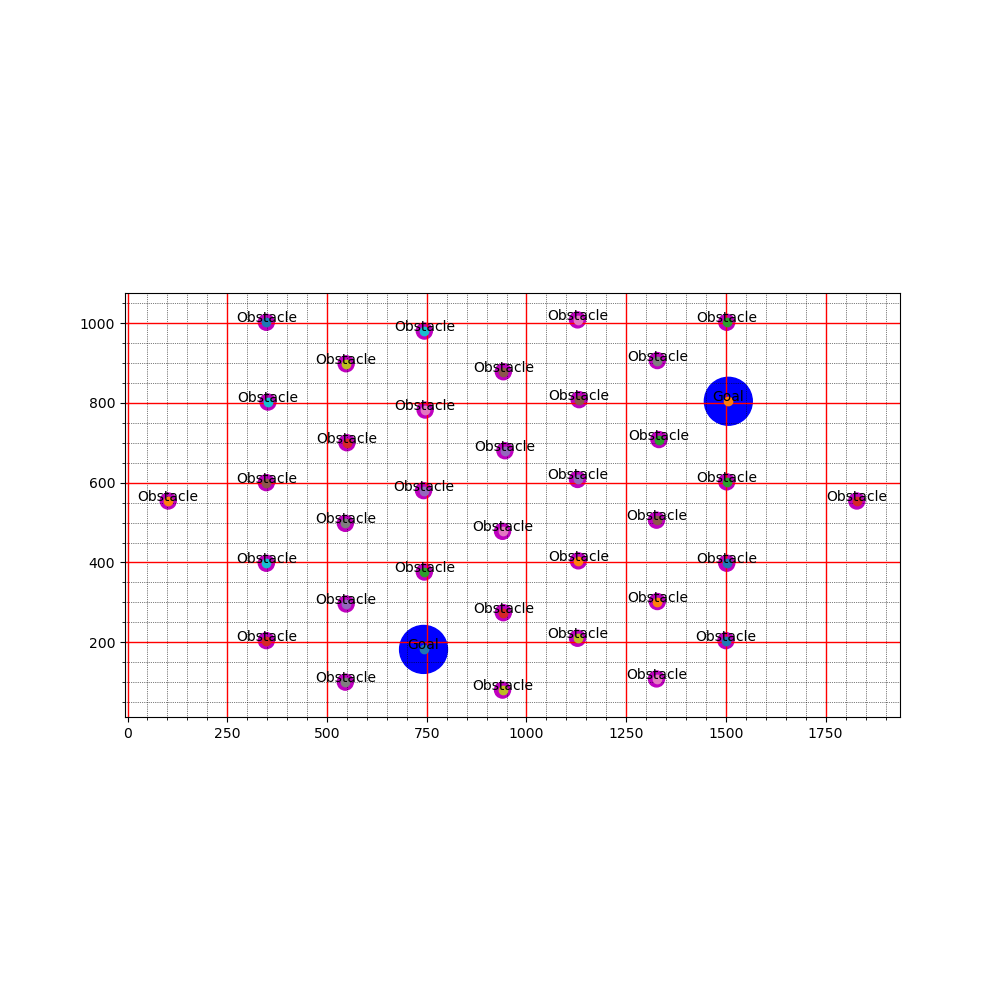

In [206]:
fig, ax = plt.subplots(figsize = ( 10, 10))
ax.set_aspect('equal')
plot_graph( X, Y, start_x, start_y, 'Goal', fig, ax, ( start_x, start_y ), goalR, 0, 'b' )
plot_graph( X, Y, start_x, start_y, 'Goal', fig, ax, ( goal_x, goal_y ), goalR, 0, 'b' )
for ob in obsPoints:
    plot_graph( X, Y, start_x, start_y, 'Obstacle', fig, ax, ob, r, 0, 'm' )
plt.show()

## Obstacles

In [207]:
class Obstacle():
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.repulsion = 0

    def set_repulsion(self, repulsion):
        self.repulsion = repulsion

In [208]:
class Exploration():
    def __init__(self, x, y):
        self.x = x 
        self.y = y
        self.cost = 0
        self.parent_node = None

    def set_score(self, score):
        self.score = score

    def set_parent_node( self, parent ):
        self.parent_node = parent

In [209]:

class Algorithm():
    def __init__(self, start_pos, goal_pos, map_size):
        self.__name__ = "DijikstraAlg"
        self.start_pos= start_pos
        self.goal_pos = goal_pos
        self.map_size = map_size

        self.obstacles = []

    def set_obstacles(self, obstacles=[]):
        self.obstacles = obstacles

    def render_obstacles(self):
        pass

In [210]:
algo = Algorithm( ( 0, 0 ), ( 35, 40 ), (1920, 1080) )

In [214]:
obsArr = []
for index, obj in enumerate(obstacles):
    if index != start_point and index != end_point:
        obsClass = Obstacle( obj['x'], obj['y'] )
        obsArr.append( obsClass )

In [215]:
print( obsArr )

[<__main__.Obstacle object at 0x16449d700>, <__main__.Obstacle object at 0x1646da610>, <__main__.Obstacle object at 0x1646da310>, <__main__.Obstacle object at 0x1646dabe0>, <__main__.Obstacle object at 0x1646da070>, <__main__.Obstacle object at 0x1646da2e0>, <__main__.Obstacle object at 0x1646dac40>, <__main__.Obstacle object at 0x1646dab20>, <__main__.Obstacle object at 0x1646da0d0>, <__main__.Obstacle object at 0x1646da6a0>, <__main__.Obstacle object at 0x1646dafa0>, <__main__.Obstacle object at 0x1646da850>, <__main__.Obstacle object at 0x1646daee0>, <__main__.Obstacle object at 0x1646dadc0>, <__main__.Obstacle object at 0x1646dae80>, <__main__.Obstacle object at 0x1646da7f0>, <__main__.Obstacle object at 0x1646da8b0>, <__main__.Obstacle object at 0x1646dad30>, <__main__.Obstacle object at 0x1646daa60>, <__main__.Obstacle object at 0x1646da790>, <__main__.Obstacle object at 0x1646da4f0>, <__main__.Obstacle object at 0x1646da9a0>, <__main__.Obstacle object at 0x1647ac610>, <__main__.

In [213]:
# import matplotlib.animation
# import matplotlib.pyplot as plt
# import numpy as np
# plt.rcParams["animation.html"] = "jshtml"
# plt.rcParams['figure.dpi'] = 150  
# plt.ioff()
# fig, ax = plt.subplots()

# x= np.linspace(0,10,100)
# def animate(t):
#     plt.cla()
#     plt.plot(x-t,x)
#     plt.xlim(0,10)

# FuncAnimation(fig, animate, frames=10)